# Yacht Price Prediction using Optimized Linear Regression


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
# Importing data
df = pd.read_csv('/content/yachtData.csv')
df.head(5)

,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
0,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
1,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
2,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
3,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
4,-2.3,0.568,4.78,3.99,3.17,0.250,1.82


In [46]:
class LinearRegression:
  def __init__(self, X, y, alpha, epsilon, epochs, gd):
    # Initialize model parameters and hyperparameters
    self.X = X
    self.y = y
    self.alpha = alpha
    self.epsilon = epsilon
    self.epochs = epochs
    self.error = 'RMSE'
    self.gd = gd

  def train_test_split(self):
    # Split the data into training and testing sets (80-20 split)
    self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.2,random_state=2)

  def scale_Train(self):
    # Standardize training data and add bias term
    self.X_train=(self.X_train - np.mean(self.X_train))/np.std(self.X_train)
    self.X_train = self.add_bias(self.X_train)

  def scale_Test(self):
    # Standardize test data and add bias term
    self.X_test=(self.X_test - np.mean(self.X_test))/np.std(self.X_test)
    self.X_test = self.add_bias(self.X_test)

  def add_bias(self,X):
    # Add a bias (intercept) term to the feature matrix
    X = np.c_[np.ones((X.shape[0],1)),X]
    return X

  def rank(self,X):
    # Compute the rank of the matrix using SVD
    u,s,v = np.linalg.svd(X)
    return np.sum(s> 1e-10)

  def full_rank(self,X):
    # Check if the matrix has full rank
    rank = self.rank(X)
    if rank == min(X.shape):
      self.fullRank = True
    else:
      self.fullRank = False

  def low_rank(self,X):
    # Check if the matrix is low rank (more features than samples)
    if X.shape[0] < X.shape[1]:
      self.lowRank = True
    else:
      self.lowRank = False

  def normal_equation(self):
    # Solve for weights using the normal equation (closed-form solution)
    return np.linalg.inv(self.X_train.T.dot(self.X_train)).dot(self.X_train.T).dot(self.y_train)

  def predict(self,X):
    # Predict target values using learned weights
    return X.dot(self.w)

  def cost_function(self,X,y):
    # Compute the cost (squared error loss)
    return 0.5 * sum((self.predict(X) - y)**2)

  def derivative(self,X,y):
    # Compute gradient of the cost function with respect to weights
    return X.T @ (self.predict(X) - y)

  def gradient_descent(self, X, y):
    # Perform gradient descent to minimize the cost function
    errors = []
    last_error = float('inf')  # Initialize with infinity

    for i in range(self.epochs):
        gradient = self.derivative(X, y)
        self.w -= self.alpha * gradient  # Update weights

        error = self.cost_function(X, y)  # Compute scalar cost
        errors.append(error)  # Store error

        # Check for convergence
        if np.abs(error - last_error) < self.epsilon:  # Use np.abs() to compare scalars
            print("Converged at iteration {}".format(i))
            break

        last_error = error  # Update last_error

    self.plot_rmse(errors)  # Plot the error sequence

  def fit(self):
    # Train the model using either the normal equation or gradient descent
    self.train_test_split()
    self.scale_Train()
    self.scale_Test()
    self.full_rank(self.X_train)
    self.low_rank(self.X_train)

    if self.fullRank and not self.lowRank and self.X_train.shape[0] < 100 and not self.gd:
      self.w = self.normal_equation()
    else:
      self.w = np.zeros(self.X_train.shape[1])
      self.gradient_descent(self.X_train,self.y_train)

  def plot_rmse(self, error_sequence):
    # Plot RMSE/error across iterations during gradient descent
    s = np.array(error_sequence)
    t = np.arange(s.size)

    fig, ax = plt.subplots()
    ax.plot(t, s, label="Errors")
    ax.set(xlabel="iterations", ylabel="Errors")
    ax.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow=True)
    plt.show()


In [47]:
# Splitting the data
X = df.values[:,:-1]
y = df.values[:,-1]

In [48]:
# Setting the hyperparameters
lr = LinearRegression(X,y,alpha = 0.0001,epsilon=0.0001,epochs=1000,gd=True)

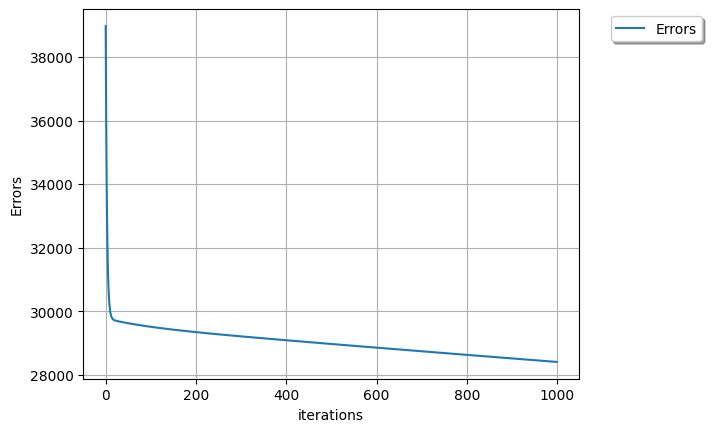

In [49]:
lr.fit()
# Model training: Error decreases rapidly at first and then slowly converges — indicates successful gradient descent